Data Preprocessing

In [31]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
import numpy as np
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import random
from mpl_toolkits import mplot3d
data=pd.read_csv("/content/gdrive/MyDrive/ml/dataset_FLD.csv",header=None)
data=data.to_numpy()

In [33]:
rows,columns=data.shape     # brining similar points to same group i.e. clustering the given data
c1=[]
c2=[]
for i in range(0,rows):
  if (data[i][columns-1]==0):
    c1.append(i)
  else:
    c2.append(i)
data = data[:,0:-1]

In [34]:
def M(data,c):                  #to find means of the clusters
  sum=np.zeros((1,columns-1))
  for j in range(0,columns-1):
    for i in c:
      sum[0][j]+=data[i][j]/len(c)

  return sum

In [35]:
M1=M(data,c1)
M2=M(data,c2)
print(M2)

[[0.22310309 0.00255859 1.01027072]]


Sw calculation

In [36]:
stemp1=np.zeros((columns-1,columns-1))
for i in c1:
  stemp1 += np.matmul((data[i]-M1).T,(data[i]-M1))
s1 = stemp1/len(c1)

stemp2=np.zeros((columns-1,columns-1))
for i in c2:
  stemp2 += np.matmul((data[i]-M2).T,(data[i]-M2))
s2 = stemp2/len(c2)
print(s1)
print(s2)
sw = s1+s2

[[ 9.69524187e+00 -2.06707971e-01  1.18281053e-04]
 [-2.06707971e-01  9.81770141e-01 -1.09539524e-03]
 [ 1.18281053e-04 -1.09539524e-03  2.54181002e-02]]
[[8.42751299 0.00950644 0.12580932]
 [0.00950644 0.99063298 0.02687313]
 [0.12580932 0.02687313 0.15394936]]


In [37]:
sw_inv = np.linalg.inv(sw)
print(sw_inv)
w = np.matmul(sw_inv,(M1-M2).T)  #since w is propotional to Sw^(-1).(M1-M2)
w_unit = w / ((np.square(w)).sum())**0.5
print(w_unit)

[[ 0.05552224  0.00607198 -0.03985285]
 [ 0.00607198  0.50861384 -0.07735819]
 [-0.03985285 -0.07735819  5.61424388]]
[[ 0.00655686]
 [ 0.01823739]
 [-0.99981218]]


Threshold Value

In [38]:
## we need to find mean and variance of projected data 
t1=[]
t2=[]
for i in c1:
  t1.append(np.matmul(data[i],w_unit)[0])
for i in c2:
  t2.append(np.matmul(data[i],w_unit)[0])
print(np.matmul(data[0],w_unit))
mean1=np.mean(t1)
mean2=np.mean(t2)
std1=np.std(t1)
std2=np.std(t2)
print(mean1)
print(mean2)
print(std1)
print(std2)

[1.01509881]
1.0074971533352852
-1.0085714575861837
0.16168139595107733
0.3898154645217035


In [39]:
#generating the guassian distribution from above means and variance and finding intersection
a = 1/(2*std1**2) - 1/(2*std2**2)
b = mean2/(std2**2) - mean1/(std1**2)
c = mean1**2 /(2*std1**2) - mean2**2 / (2*std2**2) - np.log(std2/std1)
threshold=np.roots([a,b,c])
print(threshold)

if (len(threshold) == 2):
  if (mean1>mean2):
    if (mean2<=threshold[1]<=mean1):
      finalresult=threshold[1]
    else:
      finalresult=threshold[0]
  else:
    if (mean1<=threshold[1]<=mean2):
      finalresult=threshold[1]
    else:
      finalresult=threshold[0]
else:
  finalresult=threshold[0]
print(finalresult)

[2.46345651 0.3893028 ]
0.38930280209937657


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


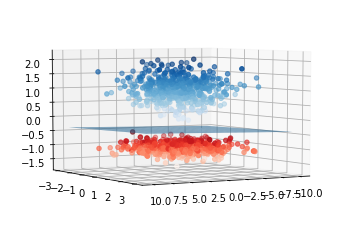

In [58]:
ax = plt.axes(projection='3d')
xdata, ydata, zdata = [], [], []
for i in c1:
  xdata.append(data[i][0])
  ydata.append(data[i][1])
  zdata.append(data[i][2])
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');
xdata, ydata, zdata = [], [], []
for i in c2:
  xdata.append(data[i][0])
  ydata.append(data[i][1])
  zdata.append(data[i][2])
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues');
xp = 2#random.randint(-10,10)
yp = 1#random.randint(-3,3)
zp = (finalresult - xp*w_unit[0] - yp*w_unit[1])/w_unit[2]
point  = np.array([xp, yp, zp])
normal = np.array([ 0.00655686, 0.01823739, -0.99981218])
d = -point.dot(normal)
xx, yy = np.meshgrid(range(-10,11), range(-3,4))
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
ax.plot_surface(xx, yy, z, alpha=0.6)
ax.view_init(5,60)

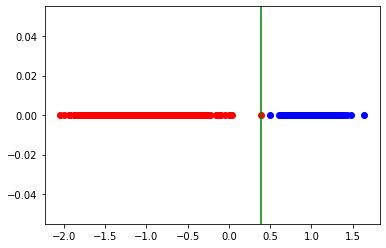

In [59]:
y = np.zeros((1,len(t1)))
plt.scatter(t1,y,c='blue')

y = np.zeros((1,len(t2)))
plt.scatter(t2,y,c='red')

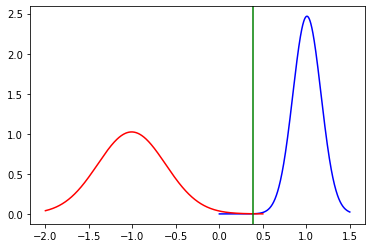

In [49]:
x_points = np.linspace(0,1.5,500)
y_points = (1/(std1 * np.sqrt(2 * np.pi))) *np.exp( - (x_points - mean1)**2 / (2 * std1**2))
plt.plot(x_points, y_points,'b')

x_point = np.linspace(-2,0.5,500)
y_point = (1/(std2 * np.sqrt(2 * np.pi))) *np.exp( - (x_point - mean2)**2 / (2 * std2**2))
plt.plot(x_point, y_point,'r')

plt.axvline(x=finalresult,color='green')

Training accuracy

In [51]:
wrong = 0
for i in range(len(c1)):
  if(np.matmul(data[c1[i]],w_unit)[0] < finalresult):
    wrong += 1
for i in range(len(c2)):
  if(np.matmul(data[c2[i]],w_unit)[0] > finalresult):
    wrong += 1

wr = (wrong/(len(c1)+len(c2)))
train_acc = (1-wr)*100
print(train_acc)

100.0
